Image shape: (467, 700, 3)


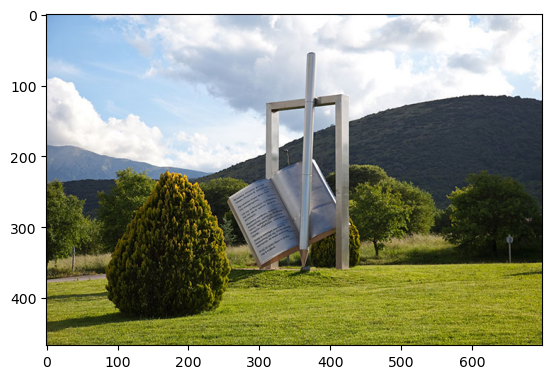

In [23]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread('images/uoi_entrance.jpg') # Read an image
print("Image shape:", img.shape) # Print image size and color depth. 
#The shape should be (H,W,C).
plt.imshow(img) # Show the original image
plt.show()

In [24]:
import copy
import time
def iterative(img):
    """ Iterative operation. """
    image = copy.deepcopy(img) # Create a copy of the image matrix
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            #Top Right
            if y < image.shape[0]/2 and x > image.shape[1]/2:
                image[y,x] = image[y,x] * np.array([0,1,0])#Keep the green channel
            #Bottom Left
            elif y > image.shape[0]/2 and x < image.shape[1]/2:
                image[y,x] = [image[y,x][2], image[y,x][1], image[y,x][0]] 
    #(B,G,R) image
            #Bottom Right
            elif y > image.shape[0]/2 and x > image.shape[1]/2:
                r,g,b = image[y,x]
                image[y,x] = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return image    

def get_channel(img, channel):
  # Function to extract 2D image corresponding to a channel index from a
  #color image.
#This function should return a H*W array which is the corresponding channel
#of the input image.
  img = copy.deepcopy(img) #create a copy of the image
  imag=img[:,:,channel] #img is an H*W*3 array.the first dimension of the 3d
#array is the height ,the second the width and the third the color channel.To
#get the channel, we take with ":" the values of the 2 first dimensions and 
#we specify the third dimension with the integer channel,so we take a 2d 
#array.if channel is 0 we take the red channel,if is 1 we take the green ,if 2 
  return imag #we take the blue.the function returns the 2d image

def merge_channels(img0, img1, img2):
  #Function to merge three single channel images to form a color image.
#This function should return a H*W*3 array which merges all three single
#channel images
#(i.e. img0, img1, img2) in the input.  
  im0 = copy.deepcopy(img0) #create a copy of the image im0 -red channel
  im1 = copy.deepcopy(img1)  #create a copy of the image im1 -green channel
  im2 = copy.deepcopy(img2)  #create a copy of the image im2 -blue channel
  image=np.zeros((im1.shape[0],im1.shape[1],3)) #create a blank array with 
#the same height and width as the channels but this has 3 dimensions. 
#The channels have 2 dimensions.
  for y in range(image.shape[0]):#we iterate the image at its 2 first dimensions
    for x in range(image.shape[1]): #for every pixel of the image array
      image[y,x,0]=im2[y,x] #we take the red channel of the image array and set 
#its value to the blue channel im2
      image[y,x,1]=im1[y,x] #we take the green channel of the image array and set 
#its value to the green channel im1
      image[y,x,2]=im0[y,x] #we take the blue channel of the image array and set 
#its value to the red channel im0
  return image    #returns the image array. creates a (B,G,R) colored image
  
def grayscale(img0, img1, img2):
  #function that takes 3 channels and returns a 3d grayscale image  
  im0 = copy.deepcopy(img0) #create a copy of the image im0 -red channel
  im1 = copy.deepcopy(img1) #create a copy of the image im1 -green channel
  im2 = copy.deepcopy(img2)  #create a copy of the image im2 -blue channel
  image=np.zeros((im1.shape[0],im1.shape[1],3))#create a blank array with the 
#same height and width as the channels but this has 
#3 dimensions. The channels have 2 dimensions.
  for y in range(image.shape[0]):#we iterate the image at its 2 first dimensions
    for x in range(image.shape[1]):#for every pixel of the image array
      image[y,x]=0.2989 * im0[y,x] + 0.5870 * im1[y,x] +0.1140 * im2[y,x] 
#we set its value to gray multiplying the corresponding
#pixel of the 3 single channels with the right number   
  return image #returns the image array.it creates a grayscale image

def vectorized(img):
  image = copy.deepcopy(img) #create a copy of the image
  a = int(image.shape[0]/2)
  b = int(image.shape[1]/2)
# Please also keep the red / green / blue channel respectively in the 
#corresponding part of image
# with the vectorized operations. You need to make sure your final generated 
#image in this
# vectorized() function is the same as the one generated from iterative().
  #Top Right: keep the green channel
  i=np.zeros((a,b,3)) #create a blank 3d array with the half height of the
#image and the half width of the image 
  i[:,:,1]=get_channel(image[:a,b:],1)#we take the green channel of the i
#array and set it to green using the get_channel 
#with parameters the top right part of the array i and 1 for the green channel     
  image[:a,b:] = i# Keep the green channel.set the top right of the image to i  

  #Bottom Left: (B,G,R) image
  f1=get_channel(image[a:,:b],0)#red channel
  f2=get_channel(image[a:,:b],1)#green channel
  f3=get_channel(image[a:,:b],2)#blue channel
  image[a:,:b] =merge_channels(f1,f2,f3)
#we set the bottom left part of the image to the (B,G,R) colored image using 
#the merge_channels with parameters the single three channels
# represented by the get_channel function with parameters the bottom left
#part of the image and the integer showing the channel
  #Bottom Right: Grayscale image
  f4=get_channel(image[a:,b:],0)#red channel
  f5=get_channel(image[a:,b:],1)#green channel
  f6=get_channel(image[a:,b:],2)#blue channel  
  image[a:,b:] =grayscale(f4,f5,f6)
#we set the bottom right part of the image to the grayscale image using 
#the grayscale with parameters the single three channels
# represented by the get_channel function with parameter the bottom right
#part of the image and the integer showing the channel
  return image #returns the image showing 4 parts of the image.one is the
#green channel,the other is the b,g,r, the other the original and 
#the last the grayscale


Iterative operation (sec): 1.0352375507354736
Vectorized operation (sec): 0.5016167163848877


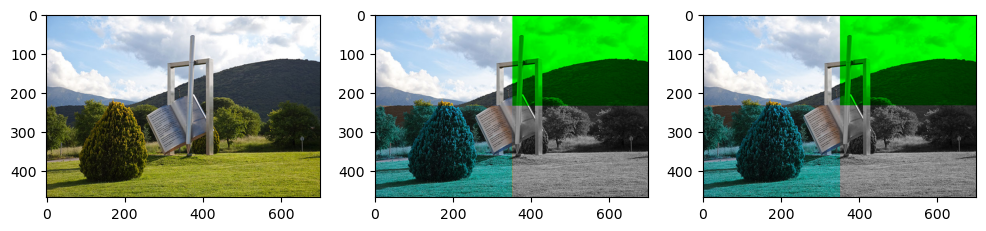

In [25]:
import time
def compare():
  img = plt.imread('images/uoi_entrance.jpg')
  cur_time = time.time()
  image_iterative = iterative(img)
  print("Iterative operation (sec):", time.time() - cur_time)
  cur_time = time.time()
  image_vectorized = vectorized(img)
  print("Vectorized operation (sec):", time.time() - cur_time)
  return image_iterative, image_vectorized
# Test your implemented get_channel()
assert len(get_channel(img, 0).shape) == 2 # Index 0
# Run the function
image_iterative, image_vectorized = compare()
# Plotting the results in sepearate subplots.
plt.figure(figsize=(12,4)) # Adjust the figure size.
plt.subplot(1, 3, 1) # Create 1x3 subplots, indexing from 1
plt.imshow(img) # Original image.
plt.subplot(1, 3, 2)
plt.imshow(image_iterative) # Iterative operations on the image.
plt.subplot(1, 3, 3)
plt.imshow(image_vectorized) # Vectorized operations on the image.
plt.show() # Show the figure.
# Note: The shown figures of image_iterative and image_vectorized
#should be identical!

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import copy

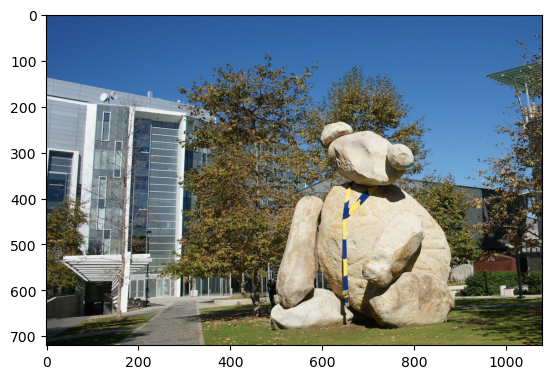

In [27]:
# (1) Read the image.
#### Write your code here. ####
img =plt.imread('images/bear.png') # Read an image
plt.imshow(img) # Show the image after reading.
plt.show()

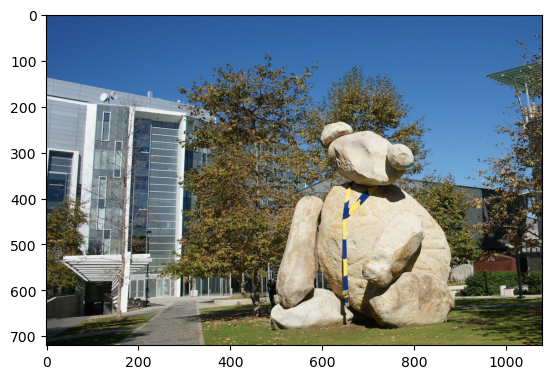

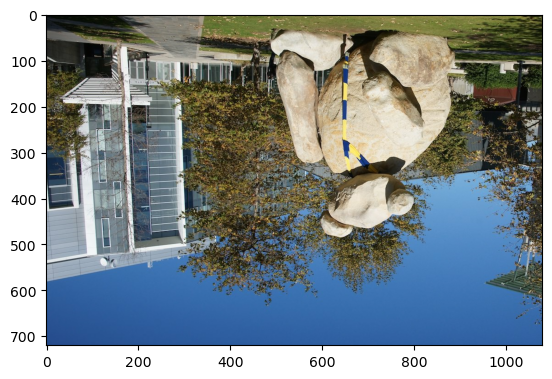

In [28]:
# (2) Flip the image from top to bottom.
def flip_img(img):#takes a 3d array and reverse its rows
#the first row of the img is the last of the f and the last row 
#of the img is the first of the f
#Function to mirror image from top to bottom.
#This function should return a H*W*3 array which is the flipped version 
#of original image.
    f=img[ ::-1]#f is an image that has reversed the order of rows
    return f #returns the f array 

plt.imshow(img)
plt.show()
flipped_img = flip_img(img)
plt.imshow(flipped_img)
plt.show()

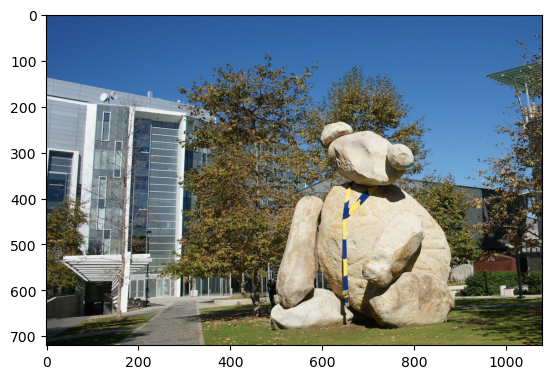

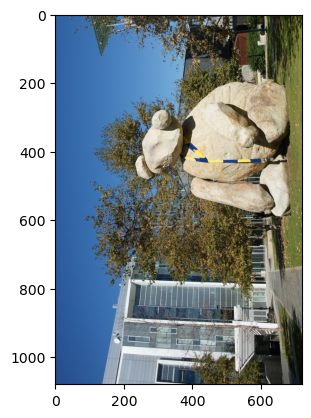

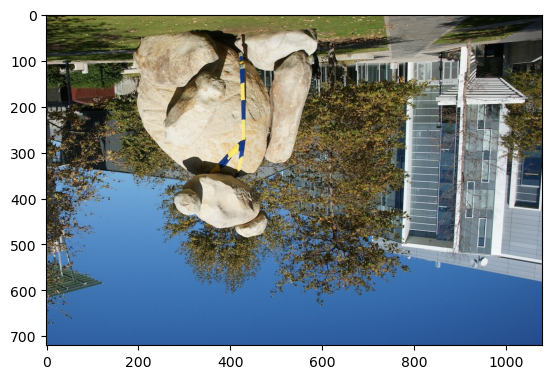

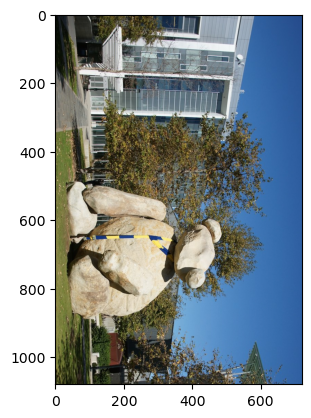

In [29]:
# (3) Rotate image.
def rotate_90(img):
#Function to rotate image 90 degrees counter-clockwise.
#This function should return a W*H*3 array which is the rotated version of
#original image.
    ar=np.zeros((img.shape[1],img.shape[0],img.shape[2]))#ar is a blank 
#array which has the dimensions of the img
    for x in range(img.shape[0]):#for every pixel in img
        for y in range(img.shape[1]):
            ar[y,x] = img[x,y] #swaping the arrays so the x axis of the 
#img is the y axis of the ar and the 
#y axis of the img is the x axis of the ar.the image with this way is
#rotated 90 degrees but if we rotate it again 
#90 degrees original image is made
    image = ar[::-1, 0:][:] #image is an array which has the rows of 
#the ar reversed to happen the rotation 
    return image #returns the image

plt.imshow(img)
plt.show()
rot90_img = rotate_90(img)
plt.imshow(rot90_img)
plt.show()
rot180_img = rotate_90(rotate_90(img))
plt.imshow(rot180_img)
plt.show()
rot270_img = rotate_90(rotate_90(rotate_90(img)))
plt.imshow(rot270_img)
plt.show() 

Face Mask Image Size: 
(162, 240, 3)
Face Mask Binary Mask Image Size: 
(162, 240, 3)


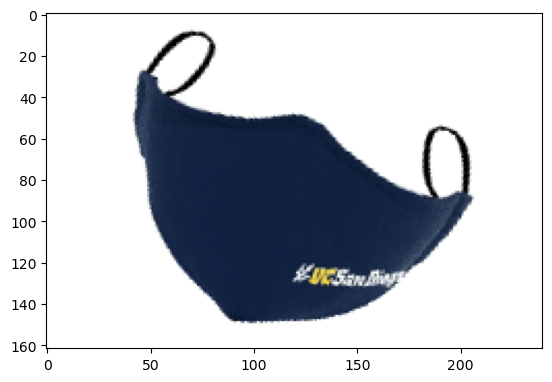

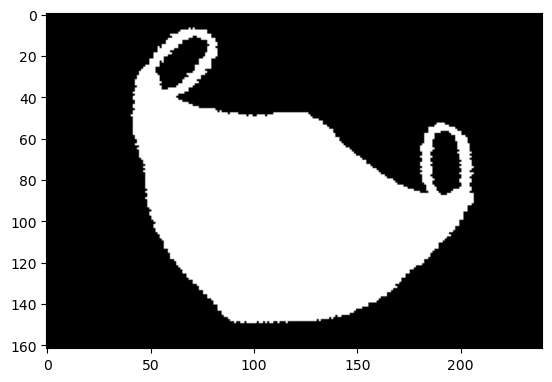

In [30]:
 # (4)Read the face mask image and the face mask binary image
mask_img =plt.imread('images/face-mask.png') # Read the image of face-mask.png
bi_mask_img =plt.imread('images/face-mask-binary.png') # Read the image of
#face-mask-binary.png
print("Face Mask Image Size: ")
print(mask_img.shape)
print("Face Mask Binary Mask Image Size: ")
print(bi_mask_img.shape)
plt.imshow(mask_img)
plt.show()
plt.imshow(bi_mask_img)
plt.show()    

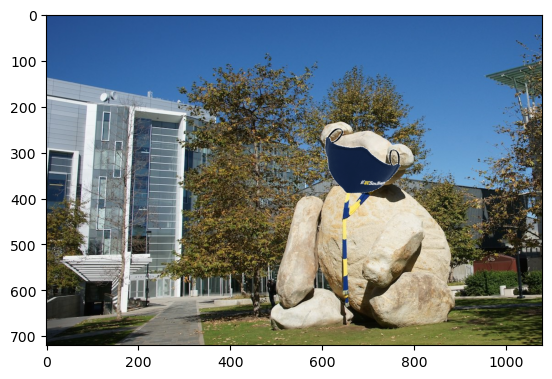

In [31]:
start_x = 565
start_y = 240
maskon_img = copy.deepcopy(img)
fin=maskon_img #copy of the image
e1=start_y+bi_mask_img.shape[0] #final point of y axis
#where the mask_img should stop in the img
e2=start_x+bi_mask_img.shape[1] #final point of x axis
#where the mask_img should stop in the img
pin=1-bi_mask_img #bi_mask_img with swapped colors
res=bi_mask_img*mask_img #array to place the masked location 
#with the mask part of the mask_img
fin[start_y:e1,start_x:e2]=fin[start_y:e1,start_x:e2]*pin+res
#the pixels of the maskon_img will be changed from the part of 
#(start_x,start_y), where the mask will be located in the bear, 
#until the part where the photo of the mask ends in the img photo.
#The part of the pixels that will be changed is set to the corresponding part 
#of the maskon_img if we multiply it to the bi_mask_img,that has swapped 
#its colors (1-bi_mask_img)
#,the mask will be black and the background will be white.if we multiply it
#with the black mask which is the 0 
#then the pixel will take the value 0 so will be black the place where the
#mask will be put in the bear in the maskon_img.In this black place 
#we want to put the image of the mask of the mask_img.This is done if we take
#the bi_mask_img and multiply it with the mask_img and add this 
#to the previous black place.If we do this multiplication,we get only the 
#mask of the mask_img and not the background of this image because
#the part of background of the mask_img is multiplied with 0 so the result is 0.
plt.imshow(maskon_img)
plt.show()

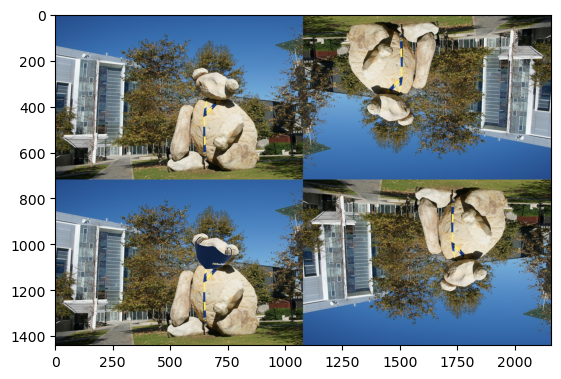

In [32]:
# (6) Write your code here to tile the four images and make a single image.
# You can use the img, flipped_img, rot180_img, maskon_img to represent
#the four images.
# After tiling, please display the tiled image.
til=np.zeros((2*img.shape[0],2*img.shape[1],maskon_img.shape[2]))#til
#is a 3d blank array which has the double height and width of the img
#top left is the original image
til[0:img.shape[0],0:img.shape[1]]=img 
#bottom right is the flipped image
til[img.shape[0]:2*img.shape[0],img.shape[1]:2*img.shape[1]]=flipped_img
 #top right is the rotated 180 degrees
til[0:img.shape[0],img.shape[1]:2*img.shape[1]]=rot180_img
#bottom left is the image with the bear and the mask
til[img.shape[0]:2*img.shape[0],0:img.shape[1]]=maskon_img 
plt.imshow(til)
plt.show()